In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [2]:
df = pd.read_table("ICPSR_35478/DS0001/35478-0001-Data.tsv")
df.head()

,YEAR,ID,INTID,FEEUSED,FEELEVEL,DATEINTV,LNGTHINV,INTAGE,INTETHN,MODE,...,SAMPCODE,SAMPLE,OVERSAMP,WTSS,WTSSNR,WTSSALL,WTCOMB,WTCOMBNR,VSTRAT,VPSU
0,2012,1,49,1,75,721,69,60,1,1,...,601,10,1,2.621963,2.869532,2.621963,6.402159,7.006659,-1,-1
1,2012,2,150,1,75,624,53,32,1,1,...,601,10,1,3.495950,3.826043,3.495950,6.514477,7.129583,-1,-1
2,2012,3,150,1,75,627,77,32,1,1,...,601,10,1,1.747975,1.913021,1.747975,1.671130,1.828920,-1,-1
3,2012,4,49,1,20,527,78,60,1,1,...,601,10,1,1.235694,1.352370,1.235694,1.181370,1.292917,-1,-1
4,2012,5,235,1,75,620,149,62,1,1,...,601,10,1,0.873988,0.956511,0.873988,0.835565,0.914460,-1,-1


Our main goal in the following visualizations is to explore some relationships between altruistic behavior and some other survery responses. To that end, we make a list of columns of interest below.

In [3]:
columns = ['YEAR', 'ID', 'AGE',
    'GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM', 'SELFLESS', 'ACCPTOTH', 'OTHSHELP', 
    'CARESELF', 'PEOPTRBL', 'SELFFRST', 'VOLMONTH', 
    'MAWRKSLF', 'MAOCC10', 'MAIND10',
    'SIBS', 'CHILDS',
    'PAOCC10', 'PAWRKSLF', 'PAIND10', 
    'RINCOME', 'RINCOM06', 'REALRINC']
df_int = df[columns]

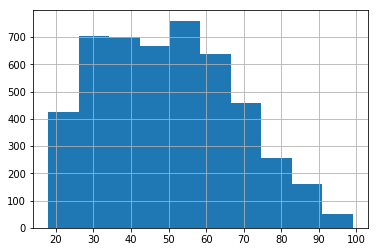

In [4]:
df_int['AGE'].hist();

We first look at the distribution of ages in the dataset. We see that we have a array of ages, from a bit before 18 through to 60+. We can further see that the ages in the survey have a bimodal character, there is a peak of ages in the bin that contains 30, and a peak in the bin a bit past 50. 

We next build a heatmap of reported altruistic activities in the survey across different age bins.

In [5]:
df_int = df_int[(df_int['AGE'] >= 18) & (df_int['AGE'] <= 66)]
age_bins = pd.cut(df_int['AGE'],
                  [18, 26, 34, 42, 50, 58, 66], 
                  include_lowest=True)
df_int = df_int.assign(AGEBIN = age_bins)

In [6]:
actions_cols = ['GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM']

df_int['present'] = df_int[actions_cols].apply(lambda x: (x >= 1) & (x <= 6)) \
                                        .all(axis=1)

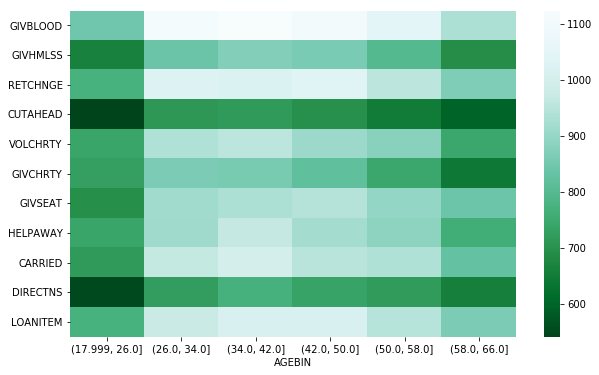

In [7]:
df_actions = df_int[df_int['present']]
actions_cols = ['AGEBIN', 'GIVBLOOD','GIVHMLSS', 'RETCHNGE', 'CUTAHEAD', 'VOLCHRTY', 'GIVCHRTY', 'GIVSEAT', 
    'HELPAWAY', 'CARRIED', 'DIRECTNS', 'LOANITEM']
plt.figure(figsize=(10,6))
sns.heatmap(df_actions[actions_cols].groupby('AGEBIN').sum().transpose(), cmap="BuGn_r"); 

To build this heatmap, we summed together a particular agebin's cumulative responses to an altruistic action question. The responses for each of these actions is a number 1-6, with 1 representing that the action is reported performed more than once a week, and 6 being that the action was not performed in the last year. The remaining numbers from 1 to 6 represent steadily decreasing frequency of the actions in the past year as the numbers increase from 1 to 6.

Thus, the darker areas of this heatmap show areas in which the actions were reported as happening most frequently. Interestingly, we see that the first and the last age bin, the oldest and the youngest populations, report the highest levels of altruistic activity. As a side note, we also observe that GIVBLOOD, which is the frequency the respondent donated blood, appears to be the overall least frequent action performed.

We now turn to an exploration of the values described by columns OTHSHELP and CARESELF, people should help less fortunate others and those in need have to take care of themselves respectively. We look for a connection between these values and the type of employment of the respondent's parents, whether self-employed or employed by someone else.

In [8]:
values_cols = ['OTHSHELP', 'CARESELF']

df_int['values_present'] = df_int[values_cols].apply(lambda x: (x >= 1) & (x <= 5)).all(axis=1)

parent_work = ['MAWRKSLF', 'PAWRKSLF']
df_int['work_self_present'] = df_int[parent_work].apply(lambda x: (x >= 1) & (x <= 2)).all(axis=1)
df_values = df_int[df_int['work_self_present'] & df_int['values_present']]

df_values = df_values.assign(both_pa_wrk=df_values['MAWRKSLF'] + df_values['PAWRKSLF'])

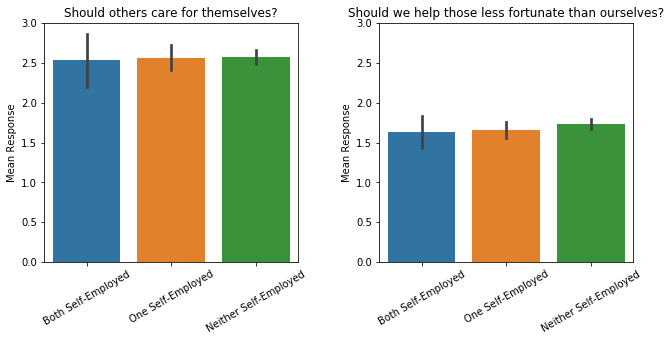

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.tight_layout(pad=5)

labels = ["Both Self-Employed", "One Self-Employed", "Neither Self-Employed"]

plt.subplot(1,2,1)
bar_1 = sns.barplot(x="both_pa_wrk", y="CARESELF", data=df_values) \
   .set_title("Should others care for themselves?")
bar_1.axes.set_xticklabels(labels)
plt.xticks(rotation=30)
plt.ylabel("Mean Response")
plt.xlabel("")
plt.ylim(0,3)

plt.subplot(1,2,2)
bar_2 = sns.barplot(x="both_pa_wrk", y="OTHSHELP", data=df_values) \
   .set_title("Should we help those less fortunate than ourselves?")
bar_2.axes.set_xticklabels(labels)
plt.xticks(rotation=30)
plt.ylabel("Mean Response")
plt.xlabel("")
plt.ylim(0,3);

Respondents were asked to rate how strongly they agree with the values questions, 1 for strong agreement, 2 for agree, 3 for neutral, 4 for disagree, and 5 for strongly disgree. Thus, a higher mean response for these charts means overall that fewer people agreed with the value question. 

We compare responses to the value questions across whether one, both, or neither of the respondent's questions were reported to be self-employed. We don't see much of a difference in any group for either question. That is, these questions don't reveal any significant trend based on these respondent attributes.

Finally, we look at one final value question, ACCPTOTH which asked the respondent how often they thought you should accept others even when they do things wrong, and across groups based on combinations of how many children the respondent had and how many siblings.

In [10]:
rows_accptoth = df_int[(df_int['ACCPTOTH'] >= 1) & (df_int['ACCPTOTH'] <= 6)]
rows_accptoth_sib_chd = rows_accptoth[(rows_accptoth['SIBS'] <= 10) & (rows_accptoth['CHILDS'] < 5)]

means_accpt = rows_accptoth_sib_chd.groupby(['CHILDS', 'SIBS'])['ACCPTOTH'].mean()

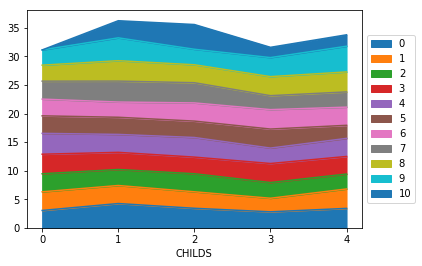

In [11]:
means_accpt.unstack('SIBS').plot.area(xticks=[0,1,2,3,4])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));

As with other questions in this survey and our numerical interpretation, the interpretation is a bit counterintuitive. A smaller amount of area will correspond to a more frequent tendency to accept others when they do things that the respondents thinks are wrong. 

There appears to be an interesting increase of area for respondents with one child and no siblings, a greater likelihood of not accepting wrong behavior. There also appears to be some variation in some color bands, but it's hard to pick out an overall pattern. This suggests there might be some interest in deciphering the variation of various sibling/children combinations more by controlling for more factors, like variation in age in respondents.

### Data Dictionary

GIVBLOOD - R DONATED BLOOD DURING THE PAST 12 MONTHS

GIVHMLSS - R HAS GIVEN FOOD OR MONEY TO A HOMELESS PERSON 

RETCHNGE - R RETURNED MONEY AFTER GETTING TOO MUCH CHANGE 

CUTAHEAD - R ALLOWED A STRANGER TO GO AHEAD OF YOU IN LINE 

VOLCHRTY - R DONE VOLUNTEER WORK FOR A CHARITY 

GIVCHRTY - R HAS GIVEN MONEY TO A CHARITY 

GIVSEAT - R OFFERED SEAT TO A STRANGER DURING PAST 12 MONTHS 

HELPAWAY - R LOOKED AFTER PLANT OR PET OF OTHERS WHILE AWAY 

CARRIED - R CARRIED A STRANGER'S BELONGINGS 

DIRECTNS - R HAS GIVEN DIRECTIONS TO A STRANGER 

LOANITEM - R HAS LET SOMEONE BORROW A ITEM OF SOME VALUE

MAWRKSLF - MOTHER SELF-EMP. OR WORKED FOR SOMEBODY

PAWRKSLF - FATHER SELF-EMP. OR WORKED FOR SOMEBODY

OTHSHELP - PEOPLE SHOULD HELP LESS FORTUNATE OTHERS 

CARESELF - THOSE IN NEED HAVE TO TAKE CARE OF THEMSELVES 

ACCPTOTH - R ACCEPT OTHERS EVEN WHEN THEY DO THINGS WRONG

### Data Source

Inter-university Consortium for Political and Social Research

General Social Survey, 2012 Merged Data, Including a Cultural Module [United States]

https://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/35478